OPTIMIZING SPAM FILTERING WITH MACHINE LEARNING



Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Collect and Read The DataSet

Handling Missing Values

In [2]:
#load our dataset
df = pd.read_csv("/content/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.info

<bound method DataFrame.info of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1      

In [4]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Unnamed: 0  label   text  label_num
0          False  False  False      False
1          False  False  False      False
2          False  False  False      False
3          False  False  False      False
4          False  False  False      False
...          ...    ...    ...        ...
5166       False  False  False      False
5167       False  False  False      False
5168       False  False  False      False
5169       False  False  False      False
5170       False  False  False      False

[5171 rows x 4 columns]>

In [5]:
df.rename({"label":"SP_LABEL","text":"SP_TEXT_GI"},inplace=True,axis=1)
df.tail()

,Unnamed: 0,SP_LABEL,SP_TEXT_GI,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


Handling Categorical Values

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['SP_LABEL']=le.fit_transform(df['SP_LABEL'])

In [7]:
df.columns=['unnamed:0','SP_LABEL','SP_TEXT','label_num']

In [8]:
df.head()

,unnamed:0,SP_LABEL,SP_TEXT,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
df.shape

(5171, 4)

In [10]:
X=df.loc[:,'SP_TEXT']
y=df.loc[:,'label_num'].values

In [11]:
print(X)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: SP_TEXT, Length: 5171, dtype: object


In [12]:
X[1]

'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X).toarray()

In [14]:
X[1]

array([0, 0, 0, ..., 0, 0, 0])

Handling imbalance Data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
print("Befor over sampling, counts of label '1':{}".format(sum(y_train==1)))
print("Befor over sampling, counts of label '0' :{} \n".format(sum(y_train==0)))

Befor over sampling, counts of label '1':1075
Befor over sampling, counts of label '0' :2544 



In [17]:
#import SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [18]:
print(" After oversampling, the shape of train_x:{}".format (X_train_res.shape))
print(" After oversampling, the shape of train_y:{}\n".format (y_train_res.shape))

 After oversampling, the shape of train_x:(5088, 50447)
 After oversampling, the shape of train_y:(5088,)



In [19]:
print("After over sampling, counts of label '1':{}".format(sum(y_train==1)))
print("After over sampling, counts of label '0' :{} \n".format(sum(y_train==0)))

After over sampling, counts of label '1':1075
After over sampling, counts of label '0' :2544 



Cleaning The Text Data

In [20]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [22]:
import re
corpus=[]
length=len(df)

In [23]:
for i in range(0,length):
  SP_TEXT=re.sub("[^a_ZA_Z0-9]"," ",df["SP_TEXT"][i])
  SP_TEXT=SP_TEXT.lower()
  SP_TEXT=SP_TEXT.split()
  pe=PorterStemmer()
  stopword=stopwords.words("english")
  SP_TEXT=[pe.stem(word)for word in SP_TEXT if not word in set (stopword)]
  SP_TEXT=" ".join(SP_TEXT)
  corpus.append(SP_TEXT)

TEXT PRE-PROCESSING

In [24]:
corpus

['988291 4 3 00',
 '9 2001 09 09',
 '25 1 5 6 12 13 13 5 15',
 '',
 '',
 '',
 '30 30 30 4 22 25 30 21 21 21 21 3 22 01 3 25 01',
 '3 100',
 '2 26 02 27 2001 10 33 02 27 2001 09 46 26 2 26 2 26 01 0 456 469 1 027',
 '21 23 2000 021 021',
 '12 5 0 025 5 0 12 15 0 15 2 2 21 0 025 5 0 12 15 0 15 8 27 1933 21 1934 17 49000 1995',
 '01405 1 4 45 60 2004',
 '28 2000 20 000 120 000 20 000',
 '',
 '384258 3 902 687 50',
 '30 0 45 1 80 1 8 20 8 1 80 2 14 5 2006 14 52 20 6 3 81 24 2 6 53 1 99 3 85 2 6 1 29 7 64 2 6 379 2 13 2 6 143 886 2 6 27 1933 21 1934 1934 042',
 '643714 02 23 2001 04 55 9879 800 85 2 17 2 28 3 6353 02 23 2001 04 21 02 22 2001 10 39',
 '2001 9643 04 26 2001 07 09 04 25 2001 06 13 2001 6 400',
 '4 09 19 2000 08 44 09 18 2000 04 53 4 4 9851 11 204 2000 9852 568 2000',
 '',
 '22 2001 8 38 05 22 2001 08 35 05 21 2001 03 26 2000 2001 16 18 2000 14 18 2001 17 2001 18 2000 18 2000 17 2001 5 17 2001 44 923 2 78 5 18 2000 43 709 5 17 2001 5 18 2000 3 3 5 4',
 '6461 35 300 300 45 350 6

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=350000)
X=cv.fit_transform(corpus).toarray()

In [26]:
import pickle
pickle.dump(cv,open('cv1.pkl','wb'))

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred=classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(y_test,y_pred)

In [30]:
print("Accuracy:", accuracy_score(y_test,y_pred*100))

Accuracy: 0.7132731958762887


HEAT MAP TO DETECT SPAM

<Axes: >

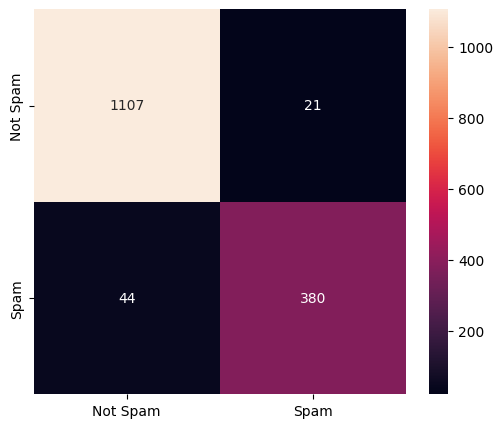

In [31]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cm1,annot= True, fmt='n',xticklabels=['Not Spam','Spam'],yticklabels=['Not Spam','Spam'])

In [32]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred=cl.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2=confusion_matrix(y_test,y_pred)
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 97.22938144329896


In [35]:
print(df.head(20))

    unnamed:0  SP_LABEL                                            SP_TEXT  \
0         605         0  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349         0  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624         0  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685         1  Subject: photoshop , windows , office . cheap ...   
4        2030         0  Subject: re : indian springs\r\nthis deal is t...   
5        2949         0  Subject: ehronline web address change\r\nthis ...   
6        2793         0  Subject: spring savings certificate - take 30 ...   
7        4185         1  Subject: looking for medication ? we ` re the ...   
8        2641         0  Subject: noms / actual flow for 2 / 26\r\nwe a...   
9        1870         0  Subject: nominations for oct . 21 - 23 , 2000\...   
10       4922         1  Subject: vocable % rnd - word asceticism\r\nvc...   
11       3799         1  Subject: report 01405 !\r\nwffur attion

Exploratory Data Analysis

Descriptive statistical

In [36]:
df.describe()

,unnamed:0,SP_LABEL,label_num
count,5171.000000,5171.000000,5171.000000
mean,2585.000000,0.289886,0.289886
std,1492.883452,0.453753,0.453753
min,0.000000,0.000000,0.000000
25%,1292.500000,0.000000,0.000000
50%,2585.000000,0.000000,0.000000
75%,3877.500000,1.000000,1.000000
max,5170.000000,1.000000,1.000000


In [37]:
df.shape

(5171, 4)



```
# This is formatted as code
```

Univariate Analysis

([<matplotlib.axis.XTick at 0x7f5d88420820>,
 [Text(0, 0, 'Non Spam'), Text(1, 0, 'Spam')])

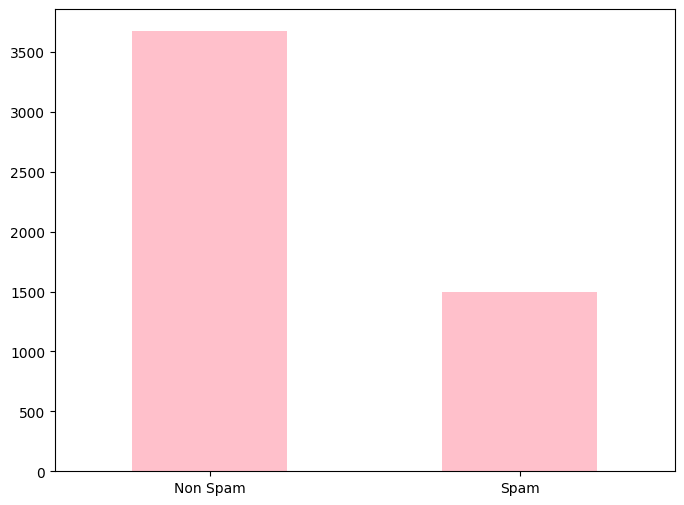

In [38]:
df["SP_LABEL"].value_counts().plot(kind='bar',figsize=(8,6),color ='pink')
plt.xticks(np.arange(2),('Non Spam','Spam'),rotation=0)

In [39]:
only_spam = df[df['label_num']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 1499
Number of Ham records: 3672


In [40]:
# Creating new feature word_count
df['word_count'] = df['SP_TEXT'].apply(lambda x: len(x.split()))

<ipython-input-41-ff21c60f164b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label_num']==0].word_count)
<ipython-input-41-ff21c60f164b>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label_num']==1].word_count, color='red')


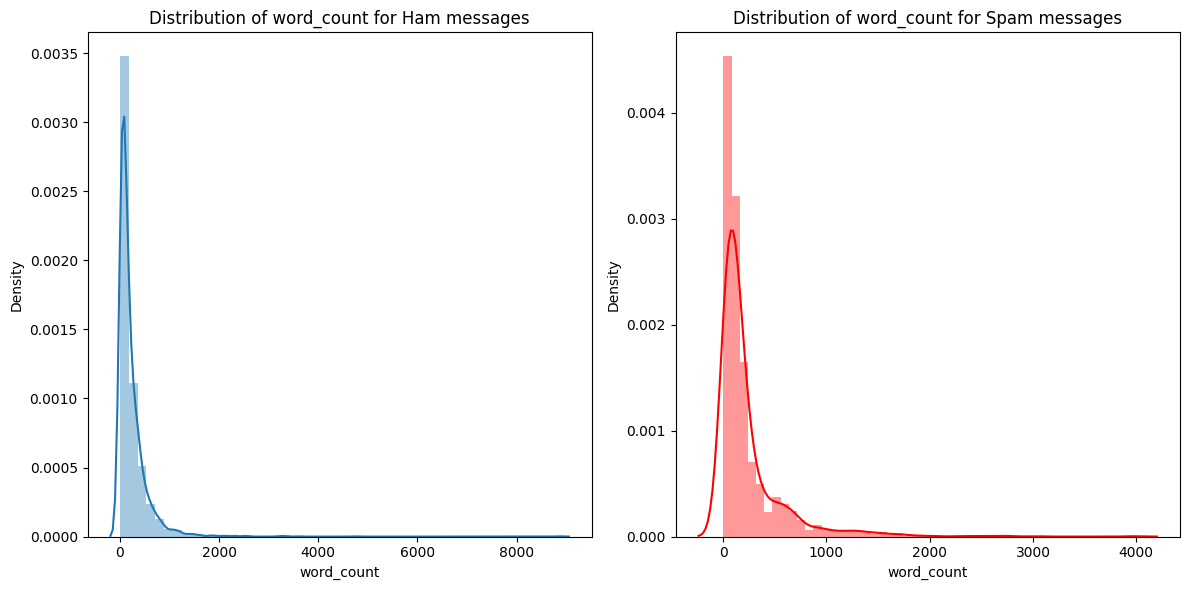

In [41]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label_num']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label_num']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()


Scaling The Data

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

Splitng Data into Train and Test

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

<Axes: xlabel='SP_LABEL', ylabel='Length'>

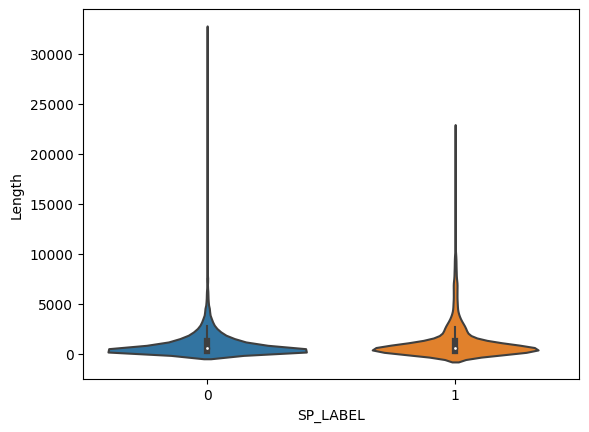

In [44]:
df_visualizations=df.copy()
df_visualizations["Length"]=df_visualizations["SP_TEXT"].apply(lambda x:len(x))
sns.violinplot(x="SP_LABEL",y="Length", data=df_visualizations)

<Axes: >

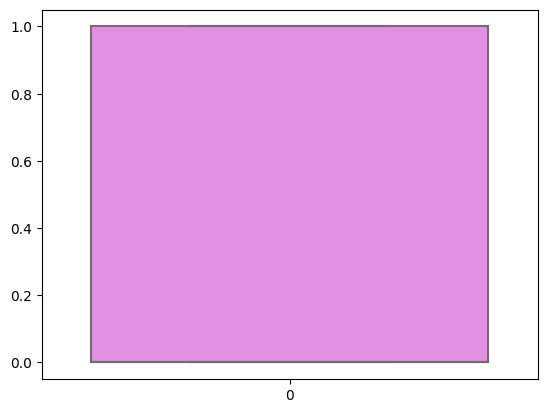

In [45]:
sns.boxplot(df['SP_LABEL'],color='violet')

<ipython-input-46-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

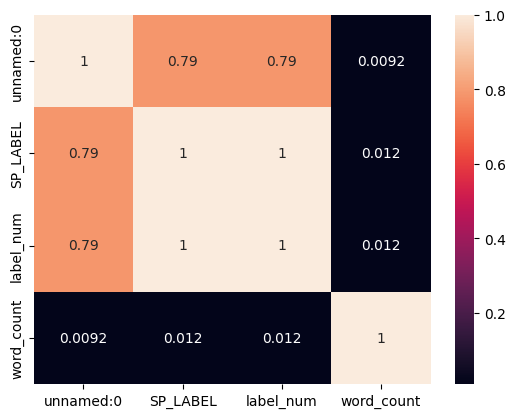

In [46]:
sns.heatmap(df.corr(),annot=True)

MODEL BUILDING

Decision Tree Model

In [ ]:
#Model Building
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_res,y_train_res)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_res,y_train_res)

Naïve Bayes model


In [ ]:
[50] #Naive Bayee model
from sklearn.naive_bayes import MultinomialNB
model =MultinomialNB()

In [ ]:
model.fit(X_train_res, y_train_res)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

In [ ]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [ ]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].isnull().sum()

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

In [ ]:
df[numerical].head()

 ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model=Sequential()

In [ ]:
X_train.shape

In [ ]:
model.add(Dense(units=X_train_res.shape[1],activation='relu',kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units=100,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
import numpy as np
y_pr=np.where(y_pred>0.5,1,0)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_test

In [ ]:
import re
from keras.models import load_model 
def new_review(new_review):
  new_review=new_review
  new_review=re.sub('[^a-zA-Z]', ' ',new_review)
  new_review=new_review.lower()
  new_review=new_review.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  new_review=[ps.stem(word)for word in new_review if not word in set(all_stopwords)]
  new_review=' '.join(new_review)
  new_corpus=[new_review]
  new_X_test=cv.transform(new_corpus).toarray()
  print(new_X_test)
  new_y_pred=loaded_model(new_X_test)
  print(new_y_pred)
  new_X_pred=np.where(new_y_predict>0,5,1,0)
  return new_y_predict
  new_review=new_review(str(input("enter the new review...")))


PERFORMANCE TESTING & HYPERPARAMETER TUNING

---



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pr)
score=accuracy_score(y_test,y_pr)
print(cm)
print("Accuracy Score Is:-",score*100)

In [ ]:
import pickle
pickle.dump(model,open('cv1.pkl','wb'))